In [3]:
import cmocean
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import matplotlib.ticker as mticker
rc = {'figure.figsize':(10,5),
      'axes.facecolor':'white',
      'axes.grid' : True,
      'grid.color': '.8',
      'font.size' : 11}
plt.rcParams.update(rc)

In [4]:
y = np.load('y.npy')
time07 = np.load('time07.npy')
time1 = np.load('time1.npy')
time2 = np.load('time2.npy')

In [5]:
L_h07 = np.load('L_h07.npy')
L_h1 = np.load('L_h1.npy')
L_h2 = np.load('L_h2.npy')

L_v07 = np.load('L_v07.npy')
L_v1 = np.load('L_v1.npy')
L_v2 = np.load('L_v2.npy')

In [6]:
U_h07 = np.load('U_h07.npy')
U_h1 = np.load('U_h1.npy')
U_h2 = np.load('U_h2.npy')

eps07 = np.load('eps07.npy')
eps1 = np.load('eps1.npy')
eps2 = np.load('eps2.npy')

N07 = np.load('N07.npy')
N1 = np.load('N1.npy')
N2 = np.load('N2.npy')

In [7]:
Frv07 = (2*np.pi*np.array(U_h07)/(np.array(L_v07)*np.sqrt(2)))
Frv1 = ((2*np.pi*np.array(U_h1)/(np.array(L_v1))))
Frv2 = ((2*np.pi*np.array(U_h2)/(np.array(L_v2)*0.5)))

Frh07 = (np.array(U_h07)/(np.array(L_h07)*np.sqrt(2)))
Frh1 = (np.array(U_h1)/(np.array(L_h1)))
Frh2 = (np.array(U_h2)/(np.array(L_h2)*0.5))

Reh07 = np.array(U_h07)*np.array(L_h07)*2000
Reh1 = np.array(U_h1)*np.array(L_h1)*2000
Reh2 = np.array(U_h2)*np.array(L_h2)*2000

/tmp/ipykernel_921/1366560272.py:30: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax1.annotate('', xy=(4000, 30), xytext=(2000, 20),


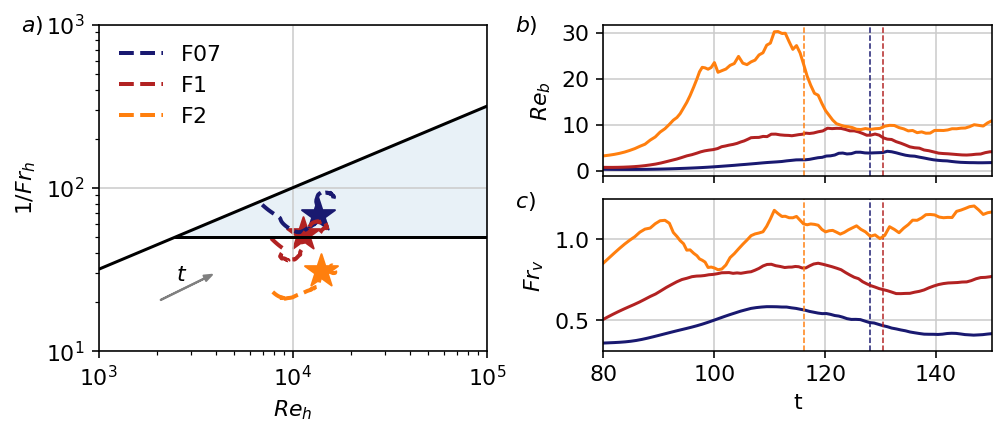

In [8]:
fig = plt.figure(figsize=(8,3))
gs=GridSpec(2,2, wspace=0.3, hspace=0.15)
ax1=fig.add_subplot(gs[:,0]) 
ax2=fig.add_subplot(gs[0,1]) 
ax3=fig.add_subplot(gs[1,1]) 

x=np.linspace(1000,100000)
ax1.plot(x,x**0.5, color='k')
ax1.fill_between(x*2.5, np.tile((1/0.02), x.shape[0]), (2.5*x)**0.5, color='tab:blue', alpha=0.1)
ax1.plot(Reh07[:], 1/Frh07[:], color='midnightblue', linewidth=2, linestyle='--', label='$\\mathrm{F07}$')
ax1.plot(Reh1[:], 1/Frh1[:], color='firebrick',linewidth=2, linestyle='--', label='$\\mathrm{F1}$')
ax1.plot(Reh2[:], 1/Frh2[:], color='tab:orange', linewidth=2,linestyle='--', label='$\\mathrm{F2}$')
ax1.scatter(Reh07[56], 1/Frh07[56], marker='*', s=300,color='midnightblue' )
ax1.scatter(Reh1[66], 1/Frh1[66], marker='*', s=300, color='firebrick')
ax1.scatter(Reh2[52], 1/Frh2[52], marker='*', s=300, color='tab:orange')
ax1.plot(2.5*x,np.tile((1/0.02), x.shape[0]), color='k')
ax1.set_xlim(1000,100000)
ax1.set_ylim(10,1000)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel('$1/Fr_h$')
ax1.set_xlabel('$Re_h$')
ax1.legend(frameon=False)
ax1.annotate('$a)$', (400,900), annotation_clip=False)
ax1.annotate('$b)$', (140000,900), annotation_clip=False)
ax1.annotate('$c)$', (140000,75), annotation_clip=False)
opt = dict(color='k', 
            arrowstyle = 'simple,head_width=.75,head_length=.75',
            connectionstyle = 'arc3,rad=0')
ax1.annotate('', xy=(4000, 30), xytext=(2000, 20), 
            arrowprops=dict(color='grey',facecolor='black', arrowstyle='simple,head_width=3,head_length=4'), size=0.5
            )
ax1.annotate('$t$', (2500,27))

ax2.plot(time07, np.array(eps07)*2000/2, color='midnightblue')
ax2.axvline(time07[56], color='midnightblue', linestyle='--', linewidth=0.75)
ax2.plot(time1,np.array(eps1)*2000, color='firebrick')
ax2.axvline(time1[66], color='firebrick', linestyle='--', linewidth=0.75)
ax2.plot(time2, np.array(eps2)*2000/0.25, color='tab:orange')
ax2.axvline(time2[52], color='tab:orange', linestyle='--', linewidth=0.75)
ax2.set_xlim(80,150)
ax2.set_yticks([0,10,20, 30])
ax2.set_ylabel('$Re_b$')
ax2.set_xticklabels([])

ax3.plot(time07, np.array(Frv07), color='midnightblue')
ax3.axvline(time07[56], color='midnightblue', linestyle='--', linewidth=0.75)
ax3.plot(time1,np.array(Frv1), color='firebrick')
ax3.axvline(time1[66], color='firebrick', linestyle='--', linewidth=0.75)
ax3.plot(time2, np.array(Frv2), color='tab:orange')
ax3.axvline(time2[52], color='tab:orange', linestyle='--', linewidth=0.75)
ax3.set_xlim(80,150)
ax3.set_xlabel('t')
ax3.set_ylabel('$Fr_v$')
fig.show()

In [9]:
Frt07 = np.array(eps07)/(np.sqrt(2)*np.array(N07)*np.array(U_h07)**2)
Frt1 = np.array(eps1)/(np.array(N1)*np.array(U_h1)**2)
Frt2 = np.array(eps2)/(0.5*np.array(N2)*np.array(U_h2)**2)

Ret07 = 2000*np.array(U_h07)**4/np.array(eps07)
Ret1 = 2000*np.array(U_h1)**4/np.array(eps1)
Ret2 = 2000*np.array(U_h2)**4/np.array(eps2)

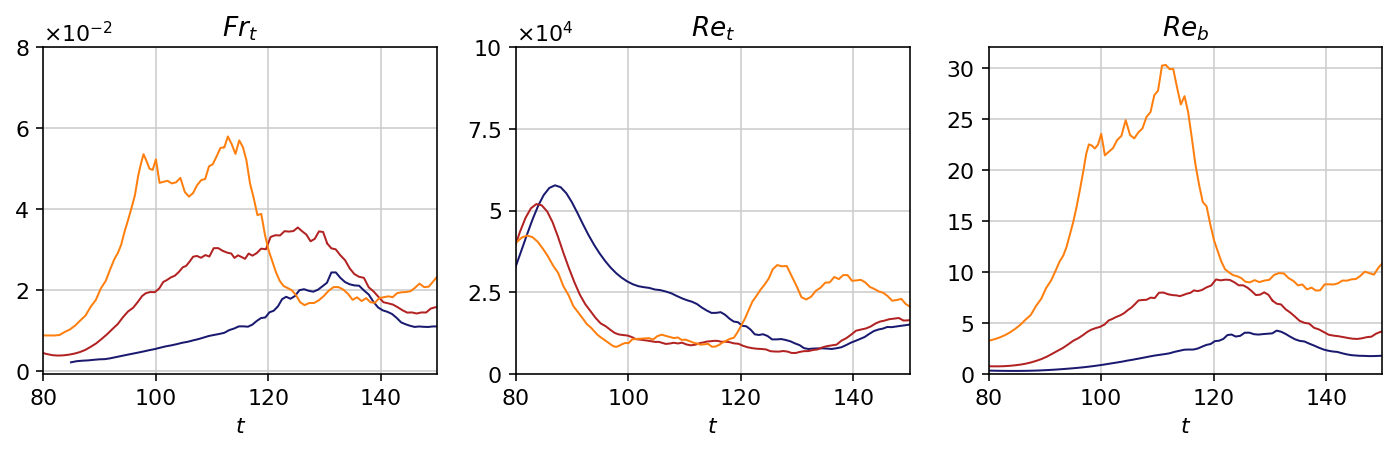

In [10]:
#Alternative turbulence parameters plots
fig, axs= plt.subplots(1,3, figsize=(12,3))

axs[0].plot(time07, Frt07, color='midnightblue', linestyle='-', linewidth=1)
axs[0].plot(time1, Frt1, color='firebrick', linestyle='-', linewidth=1)
axs[0].plot(time2, Frt2, color='tab:orange', linestyle='-', linewidth=1)
axs[0].set_xlim(80,150)
axs[0].set_title('$Fr_t$')
axs[0].set_xlabel('$t$')
axs[0].set_yticks([0,0.02, 0.04,0.06, 0.08])
axs[0].set_yticklabels(['$0$','$2$', '$4$', '$6$', '$8$'])
axs[0].annotate('$\\times 10^{-2}$',( 0+80, 0.0815), annotation_clip=False)

axs[1].plot(time07, Ret07, color='midnightblue', linestyle='-', linewidth=1)
axs[1].plot(time1, Ret1, color='firebrick', linestyle='-', linewidth=1)
axs[1].plot(time2, Ret2, color='tab:orange', linestyle='-', linewidth=1)
axs[1].set_title('$Re_t$')
axs[1].set_xlim(80,150)
axs[1].set_xlabel('$t$')
axs[1].set_yticks([0,25000, 50000,75000, 100000])
axs[1].set_yticklabels(['$0$','$2.5$', '$5$', '$7.5$', '$10$'])
axs[1].annotate('$\\times 10^{4}$',( 80, 102000), annotation_clip=False)

axs[2].plot(time07, 2000*np.array(eps07)/2,color='midnightblue', linestyle='-', linewidth=1)
axs[2].plot(time1, 2000*np.array(eps1),color='firebrick', linestyle='-', linewidth=1)
axs[2].plot(time2, 2000*np.array(eps2)/0.25,color='tab:orange', linestyle='-', linewidth=1)
axs[2].set_ylim(0,32)
axs[2].set_xlim(80,150)
axs[2].set_title('$Re_b$')
axs[2].set_xlabel('$t$')

fig.show()